Dataset Description:
    
Customer churn is when a company’s customers stop doing business with that company. Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In this project,we will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models.     

In [85]:
#Importing the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [86]:
#Loading the dataset(Creating the dataframe)
df=pd.read_csv('customer_churn.csv')

In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [88]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [89]:
df.shape

(7043, 21)

Rows--7043

Columns--21

In [90]:
df.dtypes   #Checking the datatypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [91]:
#Checking for the null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No null values are present

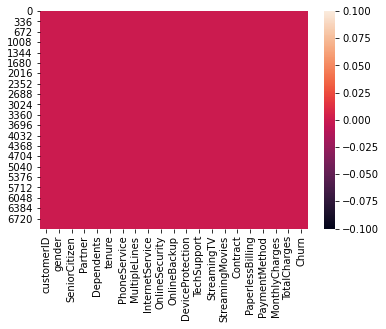

In [92]:
#Checking null values using heatmap
sns.heatmap(df.isnull())

In [93]:
pd.set_option('display.max_columns',None)

In [94]:
#EDA :

df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [95]:
#'gender'is ordinal categorical type,so we can perform LabelEncoder

df.replace({'Male':0,'Female':1},inplace=True)

In [96]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [97]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [98]:
df.replace({'No':0,'Yes':1},inplace=True)

In [99]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [100]:
df['Dependents'].value_counts()

0    4933
1    2110
Name: Dependents, dtype: int64

In [101]:
df['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [102]:
df['PhoneService'].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [103]:
df['MultipleLines'].value_counts()

0                   3390
1                   2971
No phone service     682
Name: MultipleLines, dtype: int64

In [104]:
df.replace({'No phone service':2},inplace=True)

In [105]:
df['MultipleLines'].value_counts()

0    3390
1    2971
2     682
Name: MultipleLines, dtype: int64

In [106]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
0              1526
Name: InternetService, dtype: int64

In [107]:
df.replace({'Fiber optic':1,'DSL':2},inplace=True)

In [108]:
df['StreamingTV'].value_counts()

0                      2810
1                      2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [109]:
df.replace({'No internet service':2},inplace=True)

In [110]:
df['OnlineSecurity'].value_counts()

0    3498
1    2019
2    1526
Name: OnlineSecurity, dtype: int64

In [111]:
df['OnlineBackup'].value_counts()

0    3088
1    2429
2    1526
Name: OnlineBackup, dtype: int64

In [112]:
df['DeviceProtection'].value_counts()

0    3095
1    2422
2    1526
Name: DeviceProtection, dtype: int64

In [113]:
df['TechSupport'].value_counts()

0    3473
1    2044
2    1526
Name: TechSupport, dtype: int64

In [114]:
df['StreamingMovies'].value_counts()

0    2785
1    2732
2    1526
Name: StreamingMovies, dtype: int64

In [115]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [116]:
df.replace({'Month-to-month':0,'Two year':2,'One year':1},inplace=True)

In [117]:
df['PaperlessBilling'].value_counts()

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [118]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [119]:
df.replace({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3},inplace=True)

In [120]:
df['TotalCharges'].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
595.5       1
1653.85     1
1382.9      1
4759.85     1
5625.55     1
Name: TotalCharges, Length: 6531, dtype: int64

In [121]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [122]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,151.65,1


In [123]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [124]:
#Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
df['TotalCharges']=enc.fit_transform(df['TotalCharges'].values.reshape(-1,1))

In [125]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [126]:
df.dropna(inplace=True)

In [127]:
df.shape

(7043, 21)

In [130]:
#'Customer ID'column is not playing any significant role,so we can drop it

df.drop(['customerID'],axis=1,inplace=True)

In [131]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,2,2,0,1,0,0,0,0,0,1,0,29.85,2505.0,0
1,0,0,0,0,34,1,0,2,1,0,1,0,0,0,1,0,1,56.95,1466.0,0
2,0,0,0,0,2,1,0,2,1,1,0,0,0,0,0,1,1,53.85,157.0,1
3,0,0,0,0,45,0,2,2,1,0,1,1,0,0,1,0,2,42.30,1400.0,0
4,1,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,925.0,1


In [133]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.495244,0.500013,0.00,0.0,0.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.0,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.0,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.0,1.00,1.00,1.00
MultipleLines,7043.0,0.615505,0.656039,0.00,0.0,1.00,1.00,2.00
InternetService,7043.0,1.127077,0.737796,0.00,1.0,1.00,2.00,2.00
OnlineSecurity,7043.0,0.720006,0.796885,0.00,0.0,1.00,1.00,2.00
OnlineBackup,7043.0,0.778220,0.778472,0.00,0.0,1.00,1.00,2.00


In [136]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.000485,-0.000863,0.003429,0.002032,-0.005092,-0.000985,-0.001156,0.000191,-0.000126,0.011754,0.005209,0.014569,0.005291,0.008612
SeniorCitizen,0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.099883,0.032310,-0.210897,-0.152780,-0.157095,-0.223770,-0.130130,-0.120802,-0.142554,0.156530,-0.093704,0.220173,0.037653,0.150889
Partner,0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.090981,-0.000891,0.081850,0.087055,0.094451,0.069072,0.080127,0.075779,0.294806,-0.014877,0.133115,0.096848,0.059568,-0.150448
Dependents,-0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.044590,0.190523,0.162445,0.156439,0.180832,0.140395,0.125820,0.243187,-0.111377,0.123844,-0.113890,-0.009572,-0.164221
tenure,-0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.242279,0.030359,0.145298,0.178651,0.178649,0.144459,0.136145,0.140781,0.671607,0.006152,0.340305,0.247900,0.158523,-0.352229
PhoneService,0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.387436,0.125353,0.150338,0.138755,0.123350,0.171538,0.165205,0.002247,0.016505,-0.004070,0.247398,0.083195,0.011942
MultipleLines,0.000485,0.099883,0.090981,-0.016875,0.242279,-0.691070,1.000000,0.340949,-0.235021,-0.210372,-0.200463,-0.232155,-0.202414,-0.195815,0.078613,0.108230,0.030659,0.146153,0.026847,0.019423
InternetService,-0.000863,0.032310,-0.000891,-0.044590,0.030359,-0.387436,0.340949,1.000000,-0.607788,-0.658287,-0.662957,-0.609795,-0.712890,-0.709020,-0.099721,0.138625,-0.008124,0.323260,0.055724,0.047291
OnlineSecurity,0.003429,-0.210897,0.081850,0.190523,0.145298,0.125353,-0.235021,-0.607788,1.000000,0.751661,0.749040,0.791225,0.701976,0.704984,0.389978,-0.334003,0.213800,-0.621227,-0.110337,-0.332819
OnlineBackup,0.002032,-0.152780,0.087055,0.162445,0.178651,0.150338,-0.210372,-0.658287,0.751661,1.000000,0.740604,0.754095,0.720671,0.716700,0.351267,-0.262402,0.182909,-0.538454,-0.085034,-0.291449


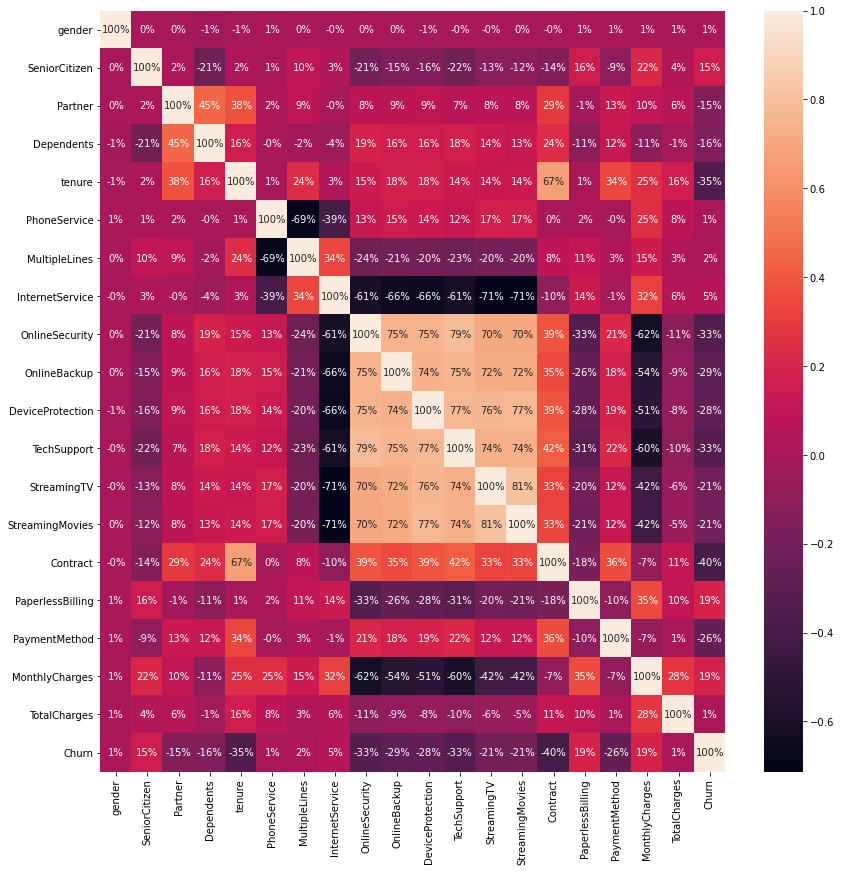

In [135]:
#Heatmap to show the correlation among the datas
plt.figure(figsize=(14,14))  
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [137]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
InternetService     0.047291
MultipleLines       0.019423
TotalCharges        0.014479
PhoneService        0.011942
gender              0.008612
Partner            -0.150448
Dependents         -0.164221
StreamingTV        -0.205742
StreamingMovies    -0.207256
PaymentMethod      -0.262818
DeviceProtection   -0.281465
OnlineBackup       -0.291449
TechSupport        -0.329852
OnlineSecurity     -0.332819
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

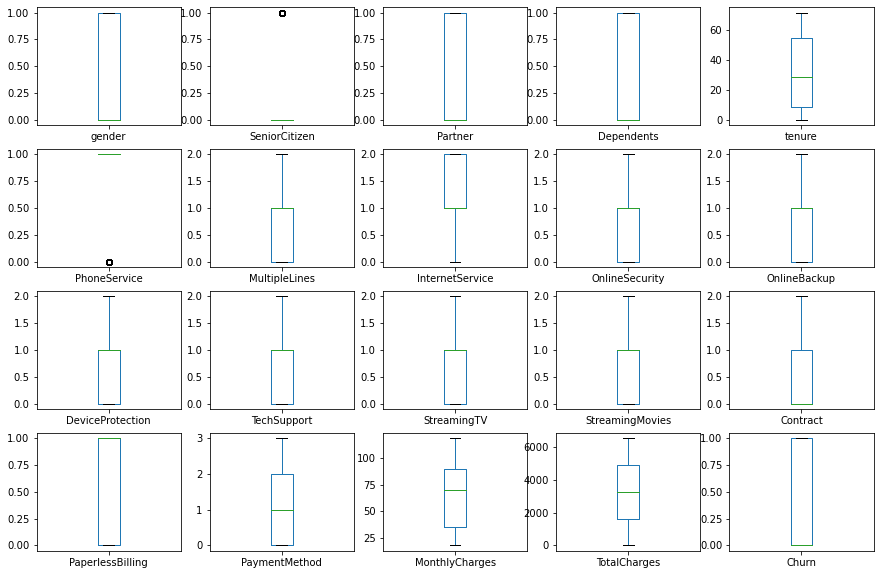

In [139]:
#Checking outliers using boxplots
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10));

By looking at the boxplots,there is no need for outlier removal.

In [140]:
#Checking for skewness
df.skew()

gender              0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.597817
InternetService    -0.205423
OnlineSecurity      0.544240
OnlineBackup        0.407747
DeviceProtection    0.410005
TechSupport         0.535671
StreamingTV         0.320192
StreamingMovies     0.312529
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod       0.218405
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

There is no skewness in the columns and there is no need of skewness removal from categorical columns

In [141]:
#Splitting the independent and target variable in x and y
x=df.drop('Churn',axis=1)
y=df['Churn']

In [142]:
#Using StandardScaler to scale the data 
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

Model Building:

In [143]:
#Using multiple Algorithms for calculating the best algo which suits best for our data set
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),KNeighborsClassifier(),SVC()]
max_accuracy_score=0
for r_state in range(40,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    for i in model:
        i.fit(train_x,train_y)
        pre=i.predict(test_x)
        acc_sc=accuracy_score(test_y,pre)
        print('accuracy score correspond to random state',r_state,'is',acc_sc)
        if acc_sc>max_accuracy_score:
            max_accuracy_score=acc_sc
            final_state=r_state
            final_model=i
print()
print()
print()
print()
print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state 40 is 0.7866666666666666
accuracy score correspond to random state 40 is 0.6924731182795699
accuracy score correspond to random state 40 is 0.7148387096774194
accuracy score correspond to random state 40 is 0.7587096774193548
accuracy score correspond to random state 40 is 0.7870967741935484
accuracy score correspond to random state 41 is 0.7918279569892474
accuracy score correspond to random state 41 is 0.7027956989247311
accuracy score correspond to random state 41 is 0.7281720430107527
accuracy score correspond to random state 41 is 0.76
accuracy score correspond to random state 41 is 0.7913978494623656
accuracy score correspond to random state 42 is 0.813763440860215
accuracy score correspond to random state 42 is 0.7101075268817204
accuracy score correspond to random state 42 is 0.7281720430107527
accuracy score correspond to random state 42 is 0.7703225806451612
accuracy score correspond to random state 42 is 0.807741935483871
accuracy sc

Above I am using for loop which helps me to provide the accuracy score at each random state and for the best state where accuracy score is maximum has come as output value.

The best model is SVC(Suport Vector Classifier) and the accuracy score is 82% to random state 59.

In [152]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=59,test_size=0.33)

In [153]:
sv=SVC()
sv.fit(train_x,train_y)
sv.score(train_x,train_y)
pred=sv.predict(test_x)
print(accuracy_score(test_y,pred))
print(confusion_matrix(test_y,pred))
print(classification_report(test_y,pred))

0.8163440860215053
[[1589  136]
 [ 291  309]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1725
           1       0.69      0.52      0.59       600

    accuracy                           0.82      2325
   macro avg       0.77      0.72      0.74      2325
weighted avg       0.81      0.82      0.81      2325



In [154]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scr=cross_val_score(sv,x,y,cv=5)
print(scr.mean())

0.8039196077166268


The actual accuracy of the model is 80%.

Now we will tune the hyperparameters and check if we can increase the model's accuracy.

In [155]:
#Creating parameters list to pass in GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
sv=SVC()
parameters={"kernel":['linear','rbf'],"C":[1,10]}
kf=KFold(n_splits=5)
gs=GridSearchCV(sv,parameters,cv=kf)
gs.fit(x,y)
print(gs.best_params_)
print(gs.best_score_)

{'C': 1, 'kernel': 'rbf'}
0.8042027913091168


The accuracy after hyperparameter tuning is also 80%.

In [156]:
#Fitting the hyperparameters into the model
from sklearn.svm import SVR
sv=SVC(kernel='rbf',C=1)
sv.fit(train_x,train_y)

SVC(C=1)

In [159]:
#Saving the model
import pickle
filename='customer_churn_model.pkl'
pickle.dump(sv,open(filename,'wb'))